# Visualising FITS and star positions

## Import modules

In [2]:
import requests, math, glob
import numpy as np
from astropy.stats import mad_std
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
from photutils import aperture_photometry, CircularAperture
from pathlib import Path
import re
from pathlib import Path
import os
os.chdir('/home/jovyan/work/src')

%load_ext autoreload
%autoreload 2

## Set reference frame, global vars

In [3]:
vastdir = '../inputfiles/ASASSN-V_J060000.76-310027.83/vast/2019_1_bestaper'
fitsdir  = '../inputfiles/ASASSN-V_J060000.76-310027.83/cleaned/2019'
savedir = '../'
PADDING = 200


In [4]:
import reading 
from collections import namedtuple

def getWcs(wcs_file):
    hdulist = fits.open(wcs_file)
    data = hdulist[0].data.astype(float)
    header = hdulist[0].header
    wcs = WCS(header)
    return wcs

wcs_file = Path(vastdir, 'new-image.fits')
#wcs = getWcs(fits_file)

# get the mapping fits file -> rotation
def extract_frame_rotation_dict(vastdir) -> float:
    filename = Path(vastdir, 'vast_image_details.log')
    the_regex = re.compile(r'^.*rotation=\s*([0-9,.,-]+).*\s+(.+)$')
    rotation_dict = {}
    with open(filename, 'r') as infile:
        for line in infile:
            thesearch = the_regex.search(line)
            if thesearch:
                path = Path(thesearch.group(2))
                rotation_dict[path.name] = float(thesearch.group(1).strip())
    return rotation_dict

# make a dict with mapping fits file -> image00007.cat
def extract_image_catalog(vastdir) -> float:
    filename = Path(vastdir, 'vast_images_catalogs.log')
    the_regex = re.compile(r'^(.*) (.*)$')
    catalog_dict = {}
    with open(filename, 'r') as infile:
        for line in infile:
            thesearch = the_regex.search(line)
            if thesearch:
                path = Path(thesearch.group(2))
                catalog_dict[path.name] = thesearch.group(1)
    return catalog_dict

ImageRecord = namedtuple('ImageRecord', 'jd, x, y, file, rotation')
starid = 174
df = reading.read_lightcurve_vast(Path(vastdir)/f'out{starid:05}.dat')
image_records = []
rotation_dict = extract_frame_rotation_dict(vastdir)
for index, row in df.iterrows():
    filename = Path(row['file']).name
    image_records.append(ImageRecord(float(row['JD']), round(row['X']), round(row['Y']), filename, float(rotation_dict[filename])))

print(image_records[0])

print("rotation dict has", len(rotation_dict), "entries")
print("imagerecords has", len(image_records), "entries")
sorted_images = sorted(image_records, key=lambda x: x.jd)


ImageRecord(jd=2458836.58742, x=813, y=1298, file='ASASSN-V_060000.76-310027.83#60V_000783664_FLAT.fit', rotation=180.0)
rotation dict has 749 entries
imagerecords has 735 entries


## Plot crop of fits for one star

In [ ]:
import glob
from matplotlib.colors import LogNorm
crop = 150
border=20
fullcrop = crop+border
padding = 200

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    print(f"x {x},y {y},startx {startx}, starty {starty}, cropx {cropx}, cropy")
    return img[starty:starty+cropy,startx:startx+cropx]

def
for idx, record in enumerate(sorted_images[5:6]):
    hdulist = fits.open(Path(fitsdir, record.file))
    data = hdulist[0].data.astype(float)
    shapex, shapey = hdulist[0].shape
    backgr = data.mean()
    data = data.reshape(shapex, shapey)
    data = np.pad(data, (padding, padding), 'constant', constant_values=(backgr, backgr))
    cropdata = data[record.y-fullcrop+padding:record.y+fullcrop+padding,record.x-fullcrop+padding:record.x+fullcrop+padding]
    rotcrop = ndimage.interpolation.rotate(cropdata, record.rotation)
    rotcrop = crop_center(rotcrop, crop, crop)
    fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
    rotx, roty = rotcrop.shape
    target_app = CircularAperture((rotx//2, roty//2), r=5.)    
    target_app.plot()
    #data[record.y-cropsize:record.y+cropsize,record.x-cropsize:record.x+cropsize] = 0
    plt.imshow(rotcrop, cmap='gray', origin='lower', norm=LogNorm())
    plt.suptitle(f"Nr {idx}, rotation is {record.rotation}, shape is {rotcrop.shape}", size=16)
    
ani = animation.FuncAnimation(fig,update_img,300,interval=30)
writer = animation.writers['ffmpeg'](fps=30)

ani.save(Path(savedir,'demo.mp4'),writer=writer,dpi=dpi)
return ani


In [ ]:
import matplotlib.animation as animation
import numpy as np
from pylab import *


dpi = 100

def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(rand(300,300),cmap='gray',interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])


    tight_layout()


    def update_img(n):
        tmp = rand(300,300)
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,300,interval=30)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save(Path(savedir,'demo.mp4'),writer=writer,dpi=dpi)
    return ani

In [ ]:
ani_frame()
print(os.getcwd())

## Save the image

In [ ]:
fig.savefig(init.basedir+'known_vs_found_10k')
plt.close(fig)




  0%|          | 0/30 [00:00<?, ?it/s]


  3%|▎         | 1/30 [00:00<00:04,  6.49it/s]


  7%|▋         | 2/30 [00:00<00:06,  4.53it/s]


 10%|█         | 3/30 [00:00<00:06,  4.17it/s]


 13%|█▎        | 4/30 [00:01<00:06,  3.80it/s]


 17%|█▋        | 5/30 [00:01<00:06,  3.81it/s]


 20%|██        | 6/30 [00:01<00:06,  3.80it/s]


 23%|██▎       | 7/30 [00:01<00:06,  3.78it/s]


 27%|██▋       | 8/30 [00:02<00:06,  3.60it/s]


 30%|███       | 9/30 [00:02<00:05,  3.64it/s]


 33%|███▎      | 10/30 [00:02<00:05,  3.66it/s]


 37%|███▋      | 11/30 [00:03<00:05,  3.58it/s]


 40%|████      | 12/30 [00:03<00:05,  3.56it/s]


 43%|████▎     | 13/30 [00:03<00:04,  3.61it/s]


 47%|████▋     | 14/30 [00:03<00:04,  3.71it/s]


 50%|█████     | 15/30 [00:04<00:03,  3.76it/s]


 53%|█████▎    | 16/30 [00:04<00:03,  3.78it/s]


 57%|█████▋    | 17/30 [00:04<00:03,  3.81it/s]


 60%|██████    | 18/30 [00:04<00:03,  3.81it/s]


 63%|██████▎   | 19/30 [00:05<00:02,  3.72it/s]/opt/conda/lib/pyt

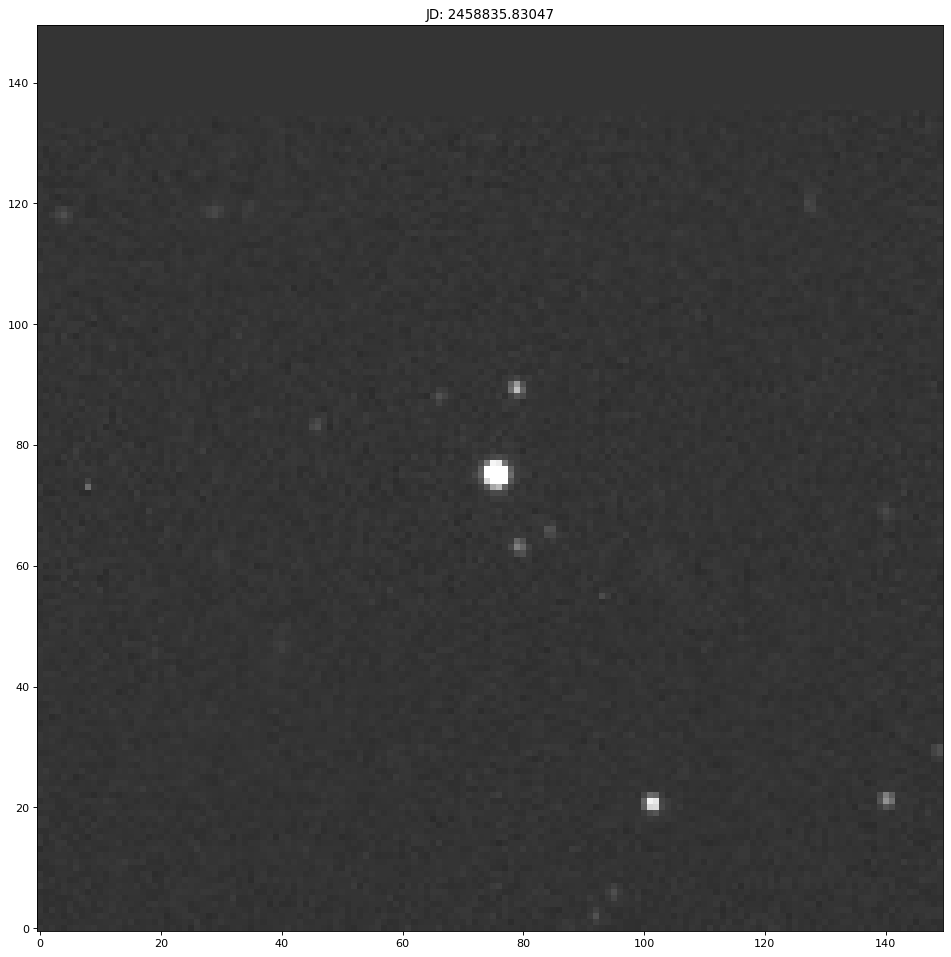

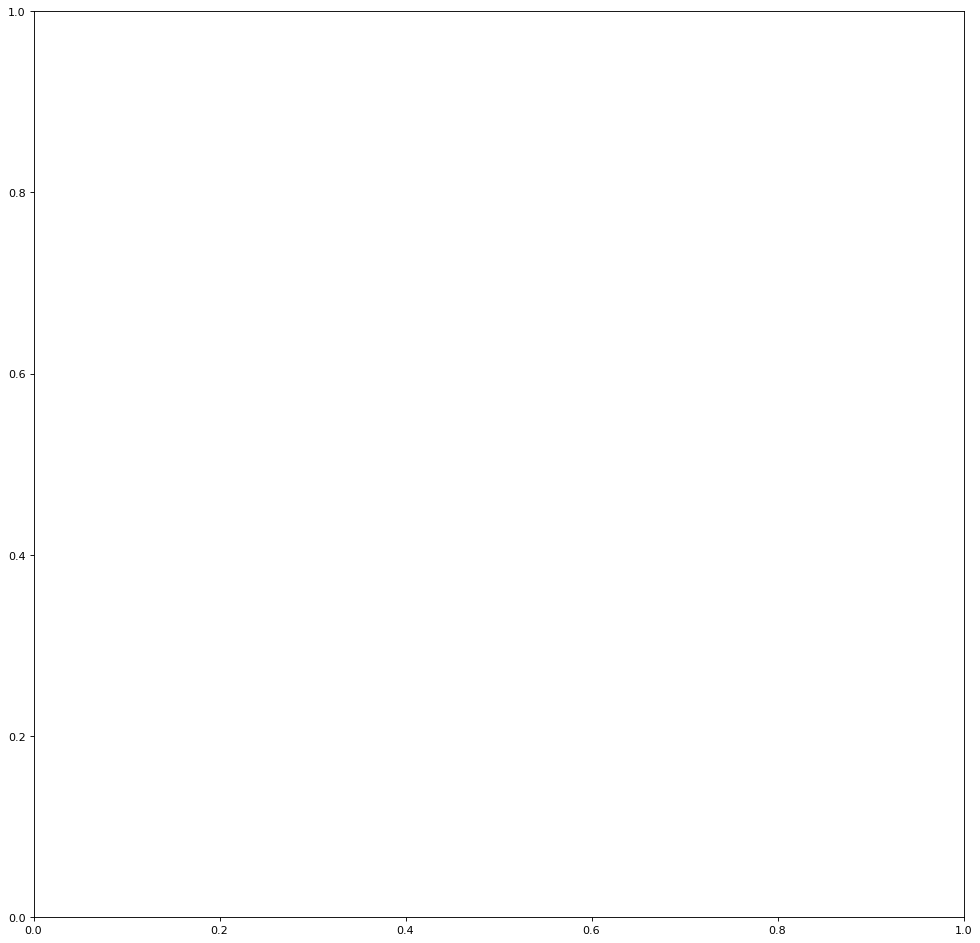

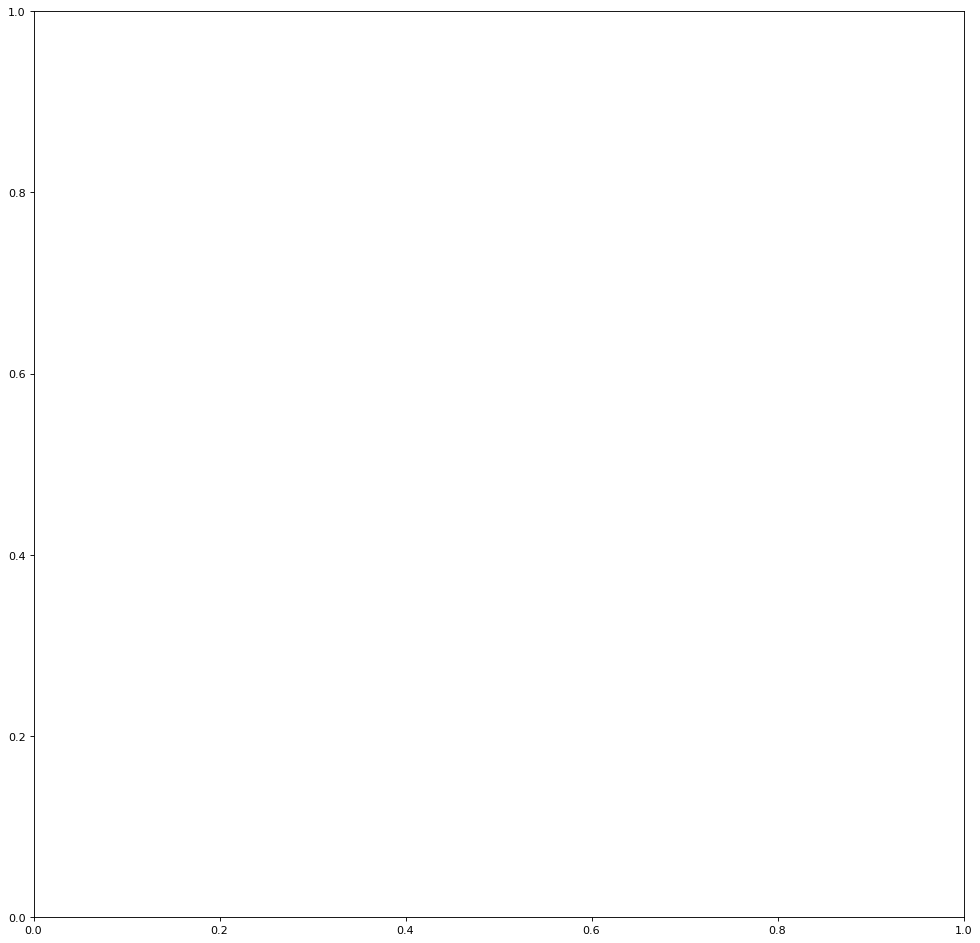

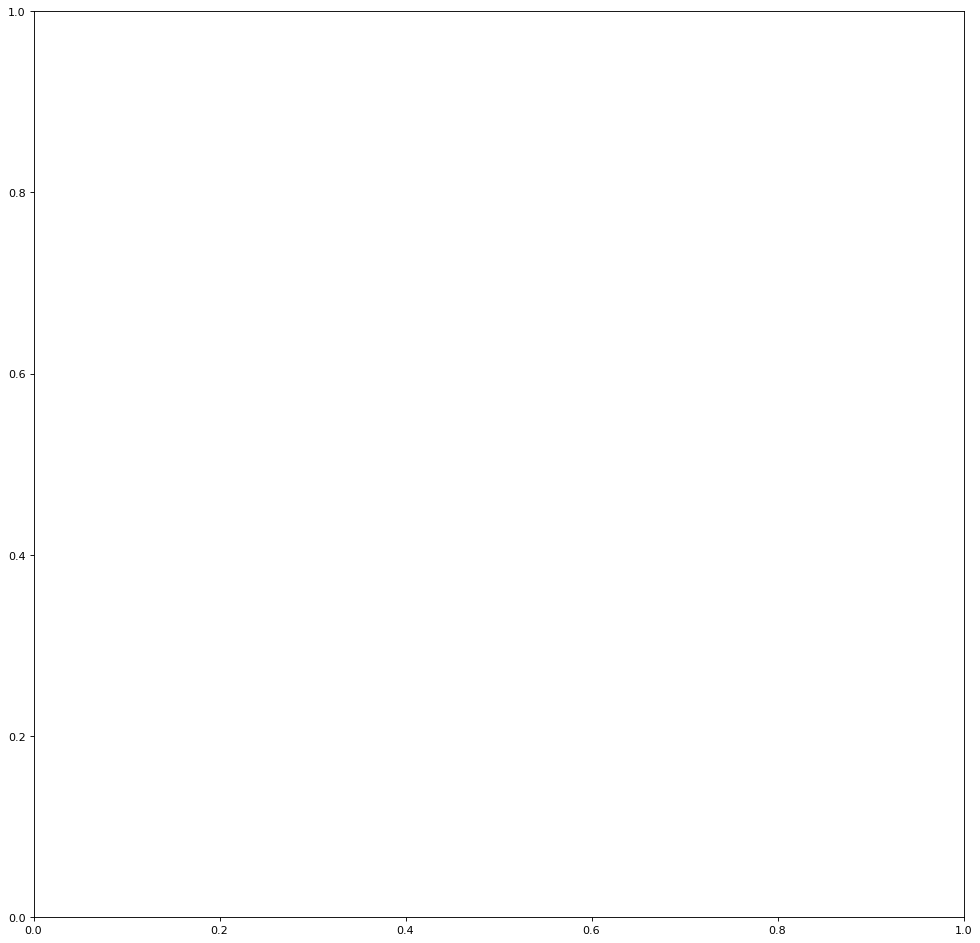

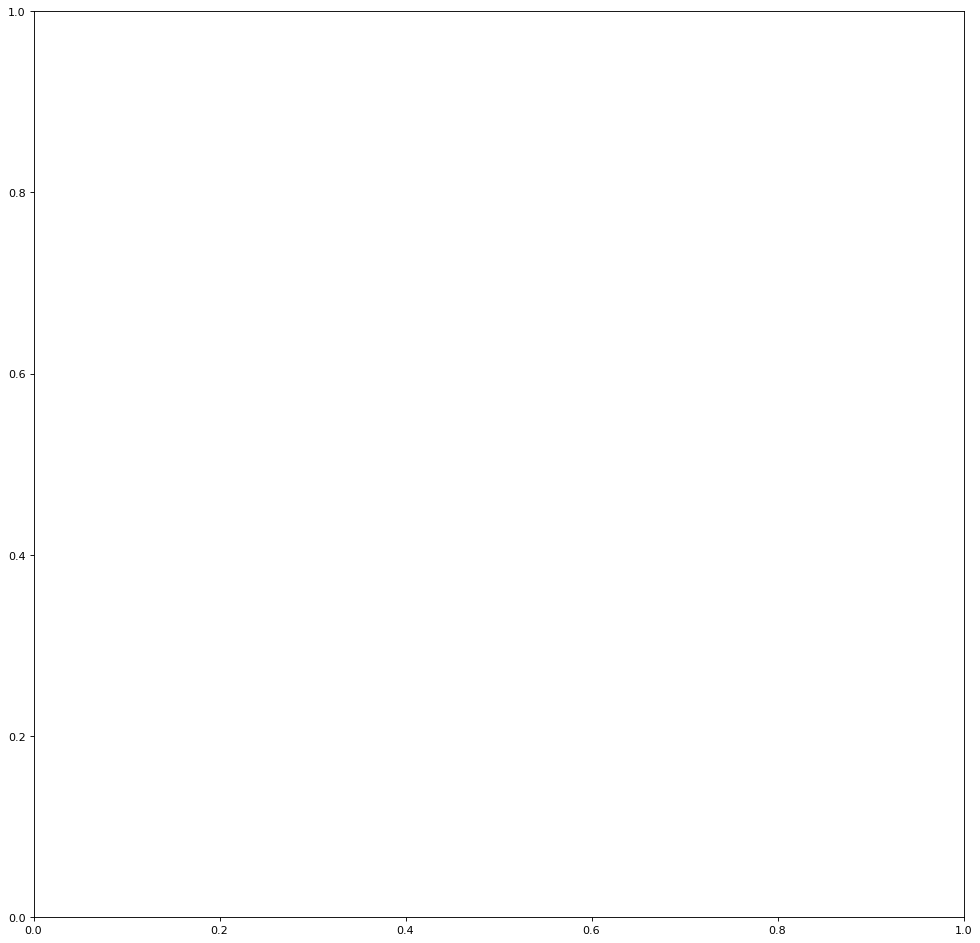

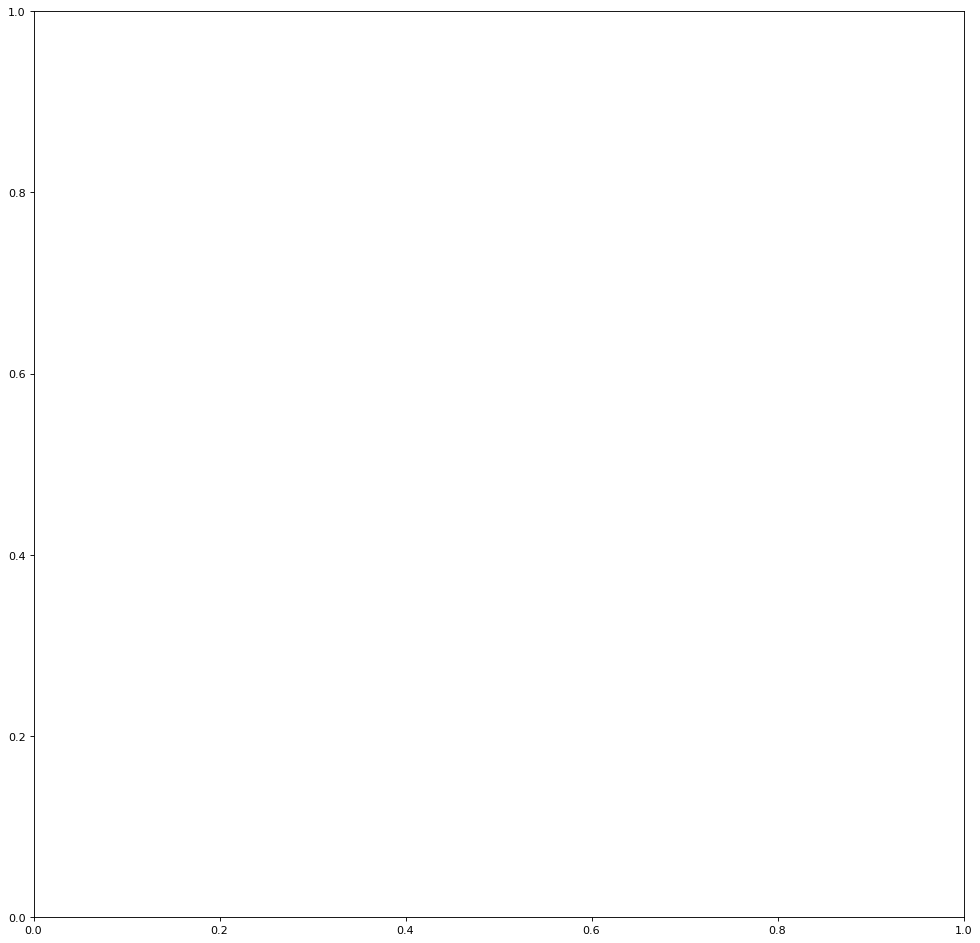

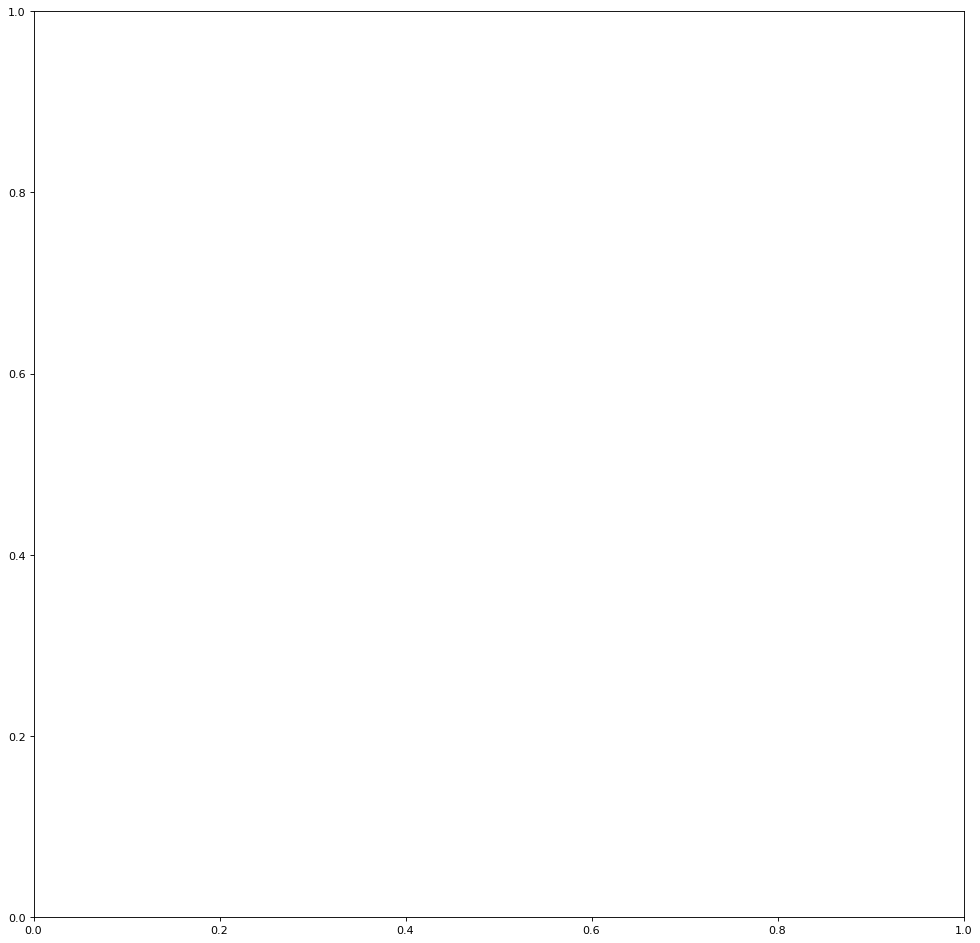

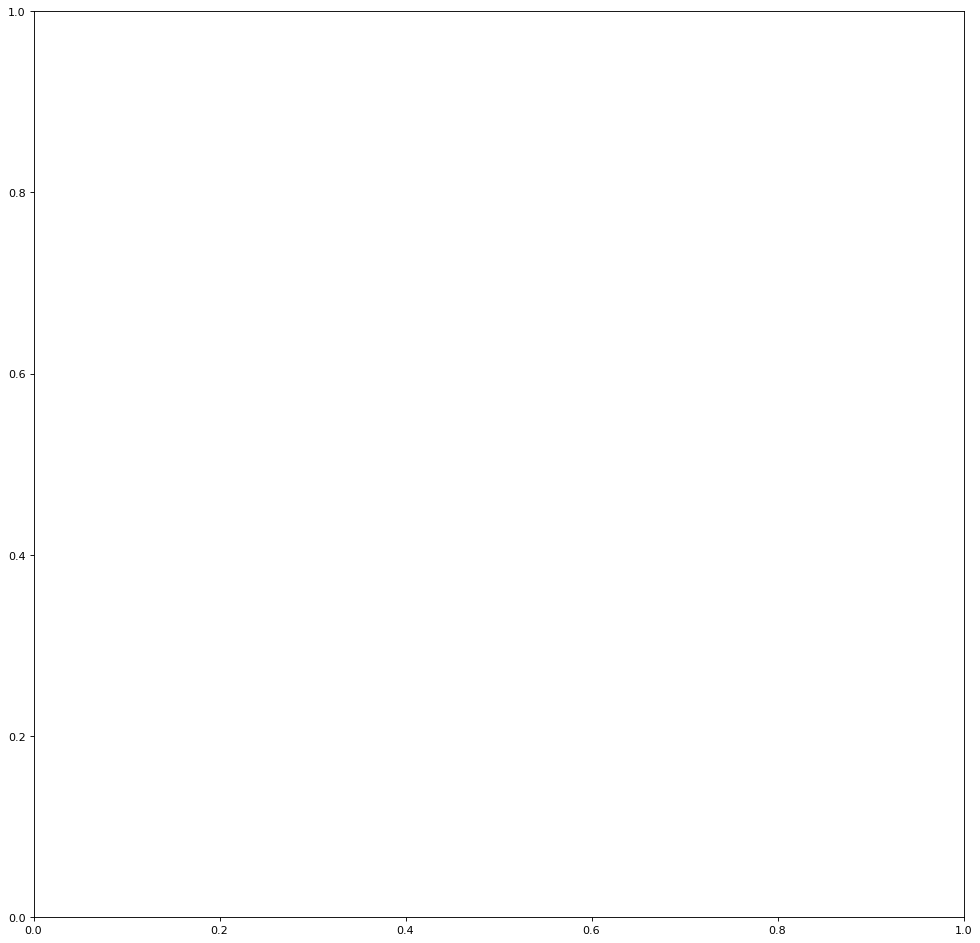

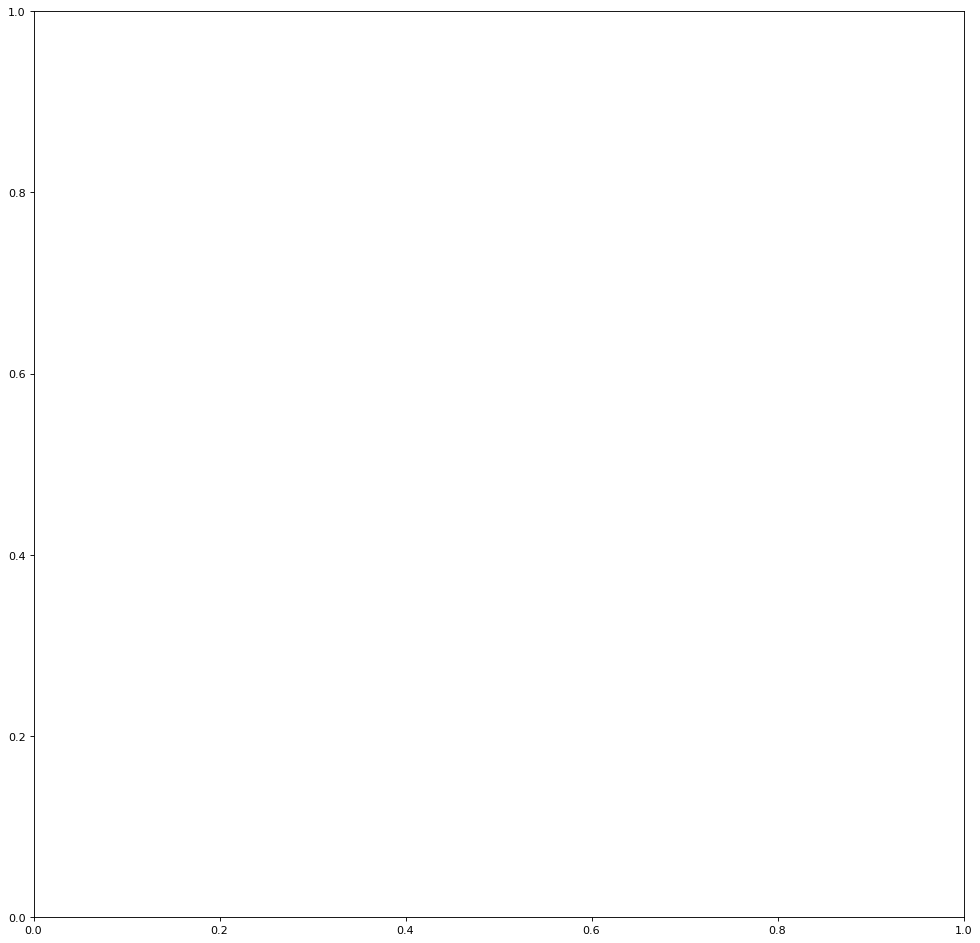

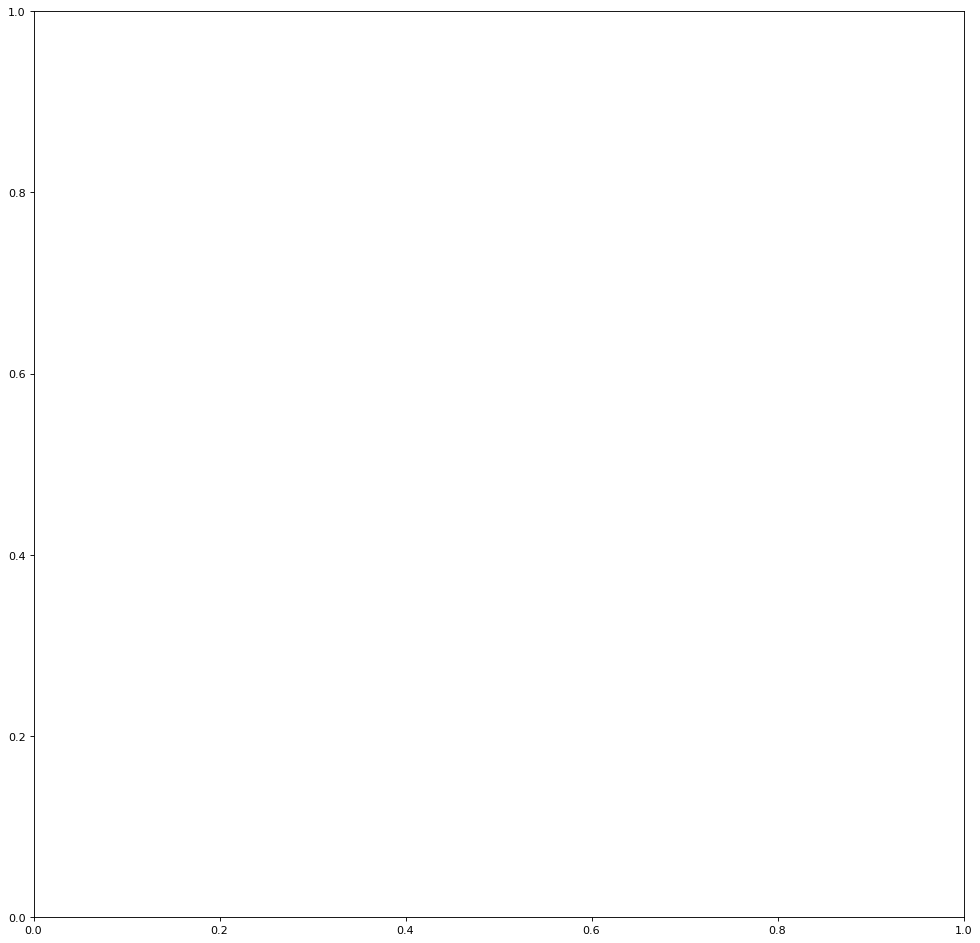

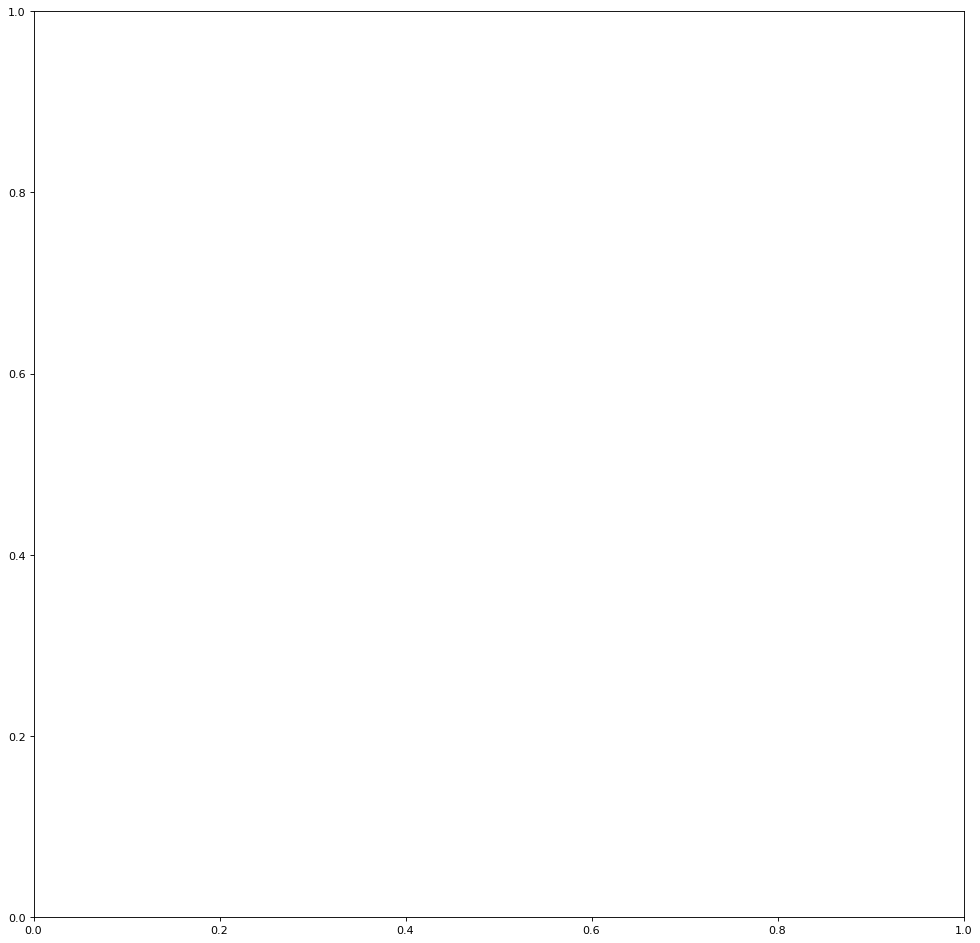

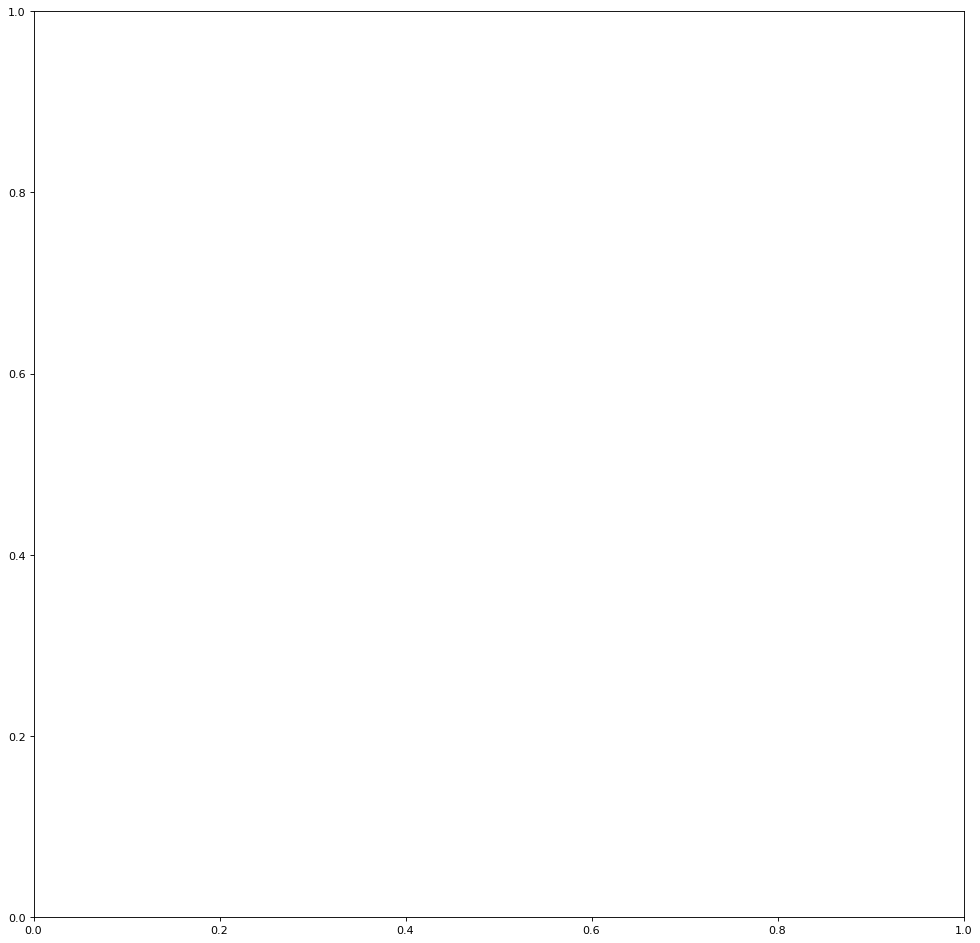

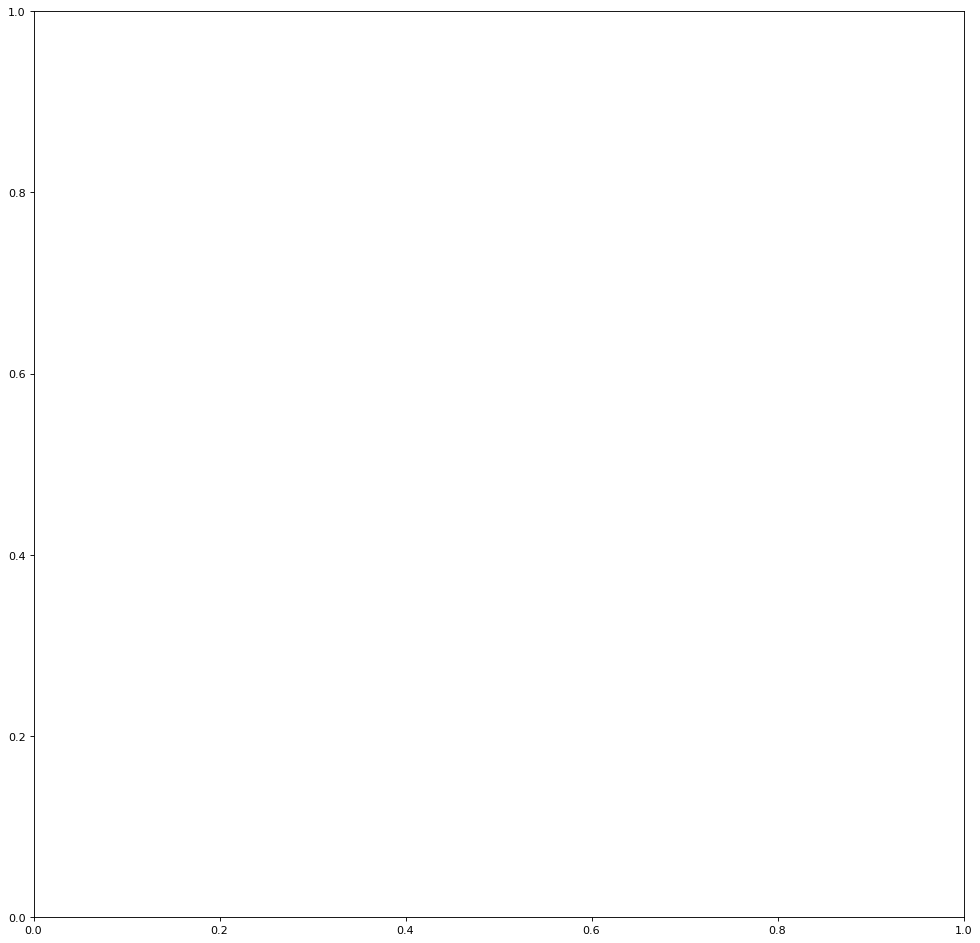

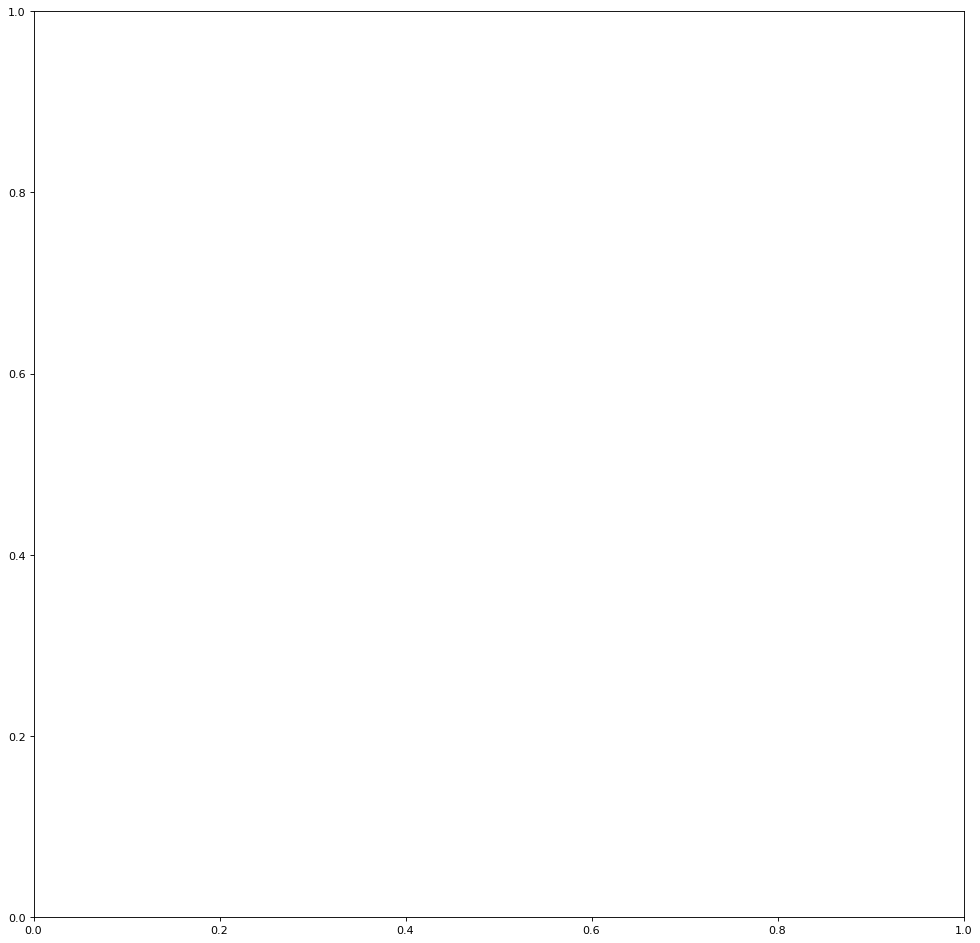

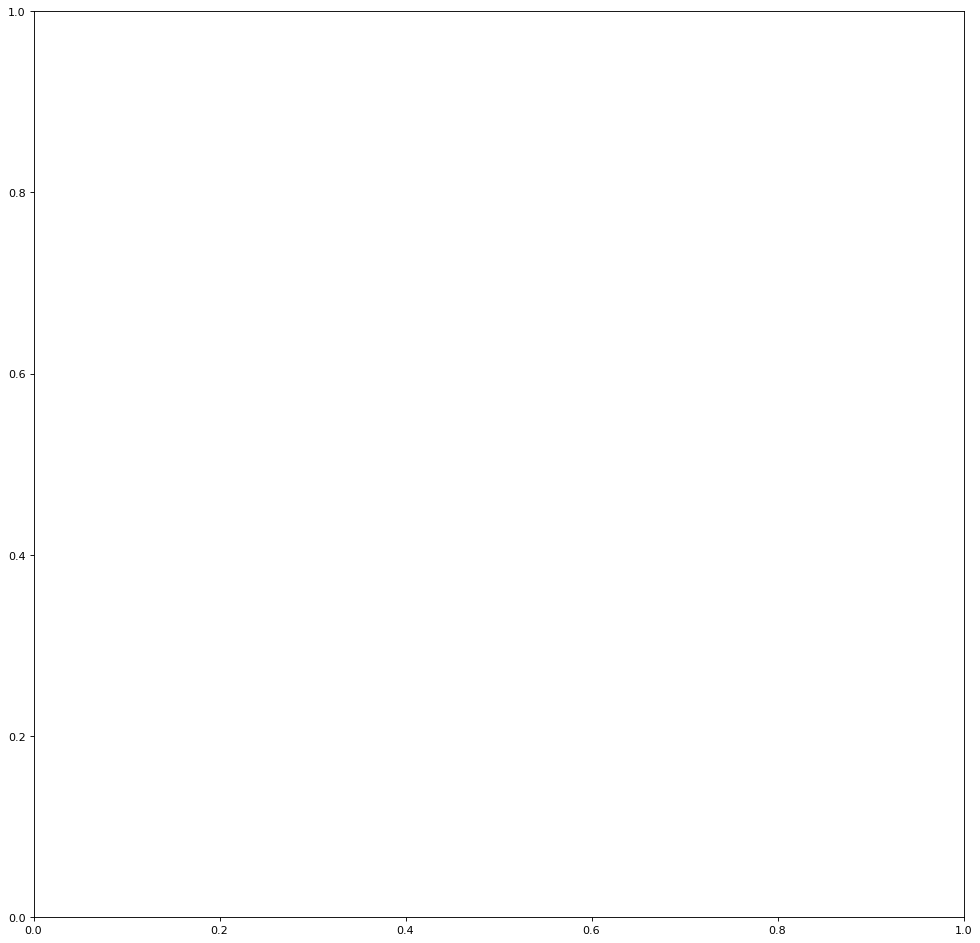

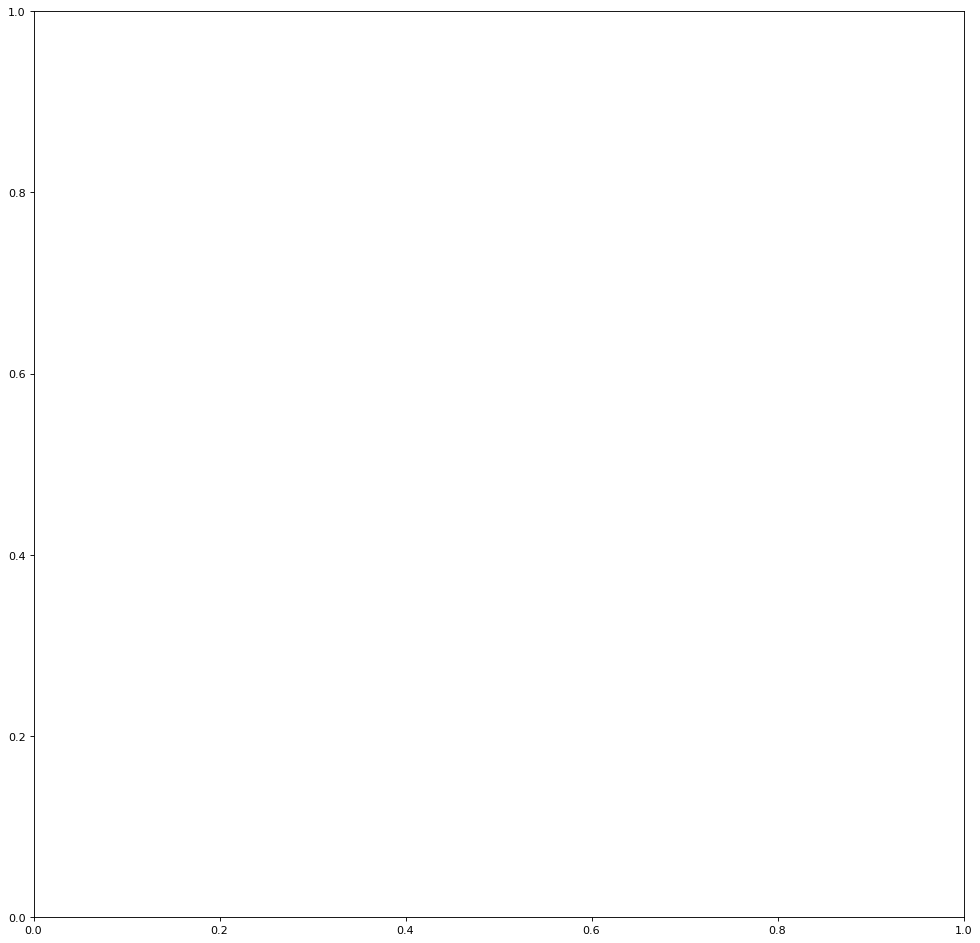

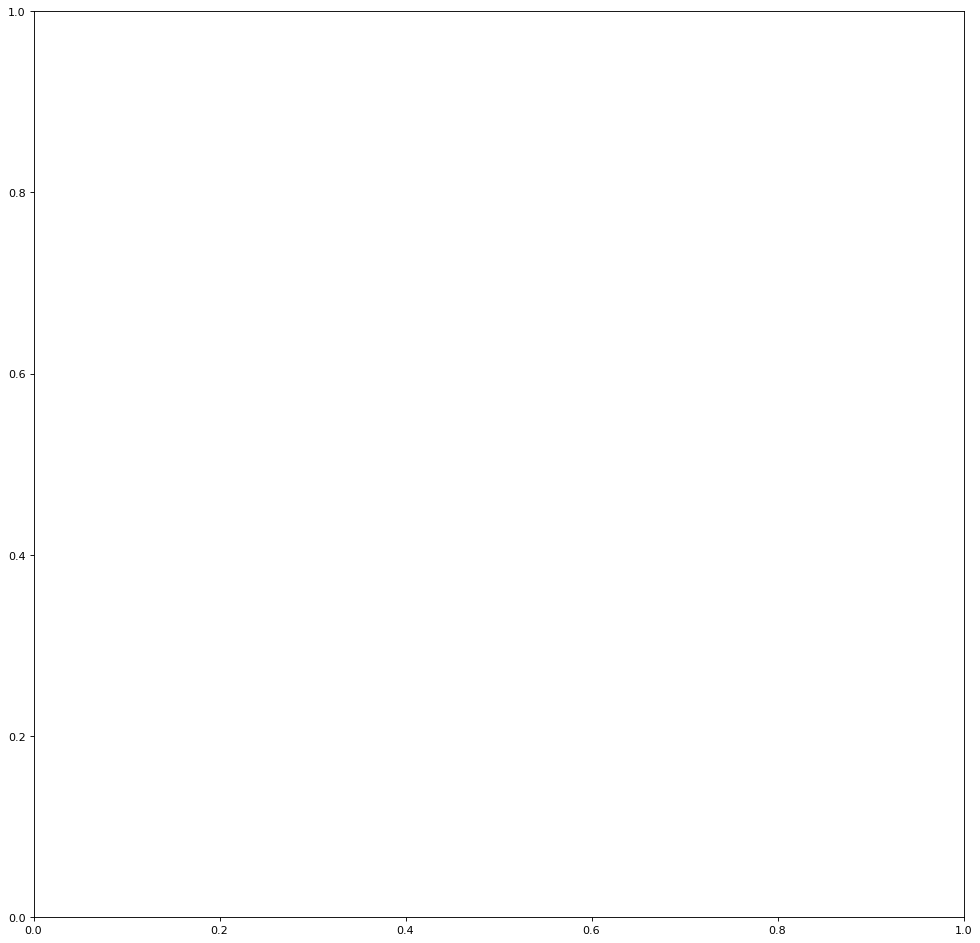

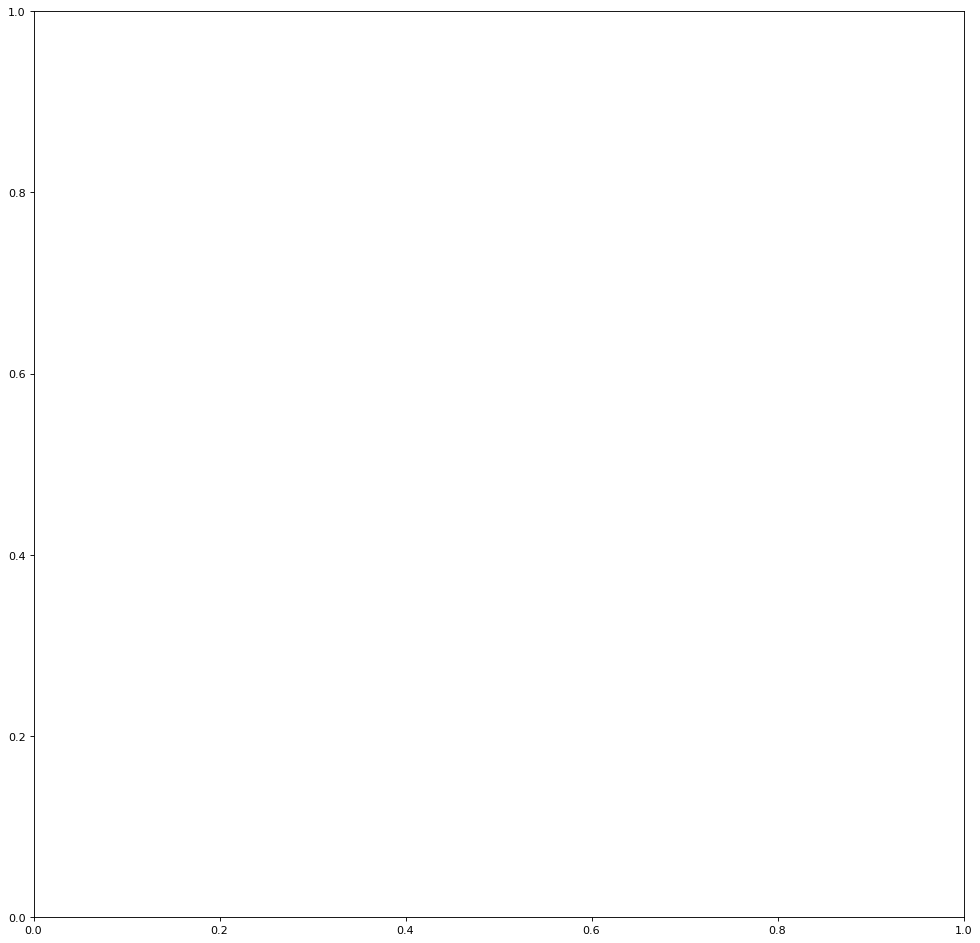

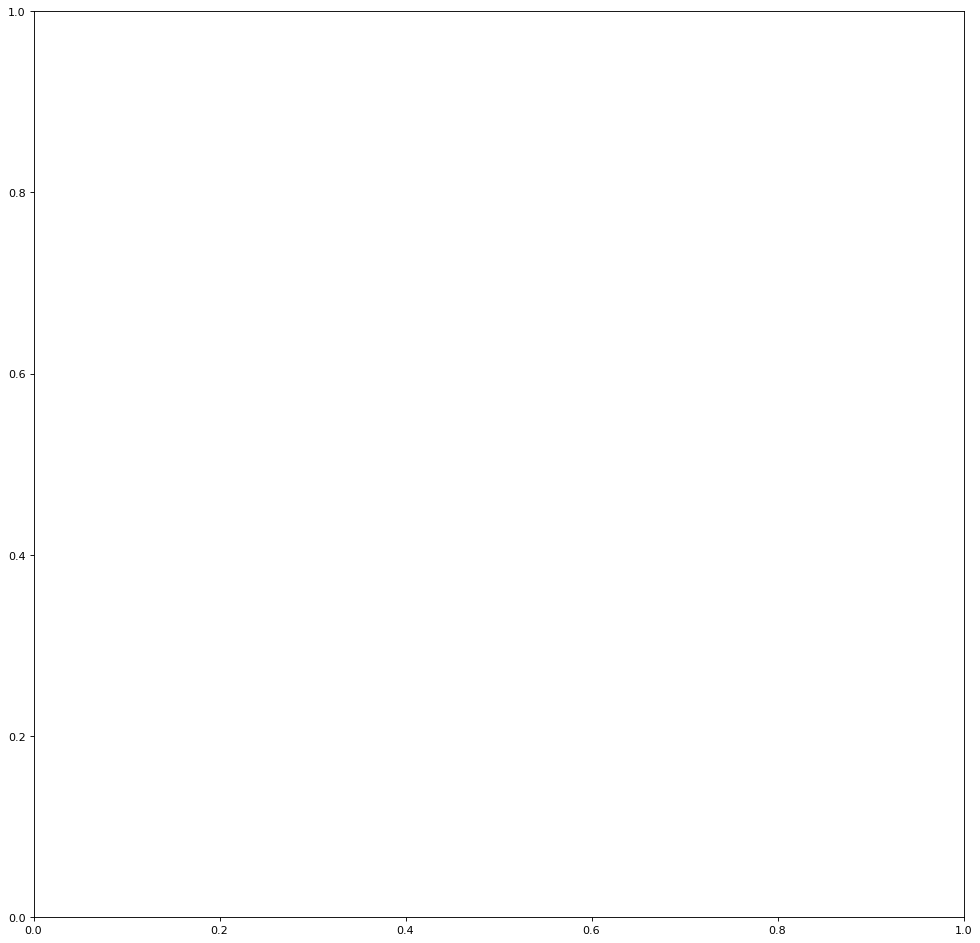

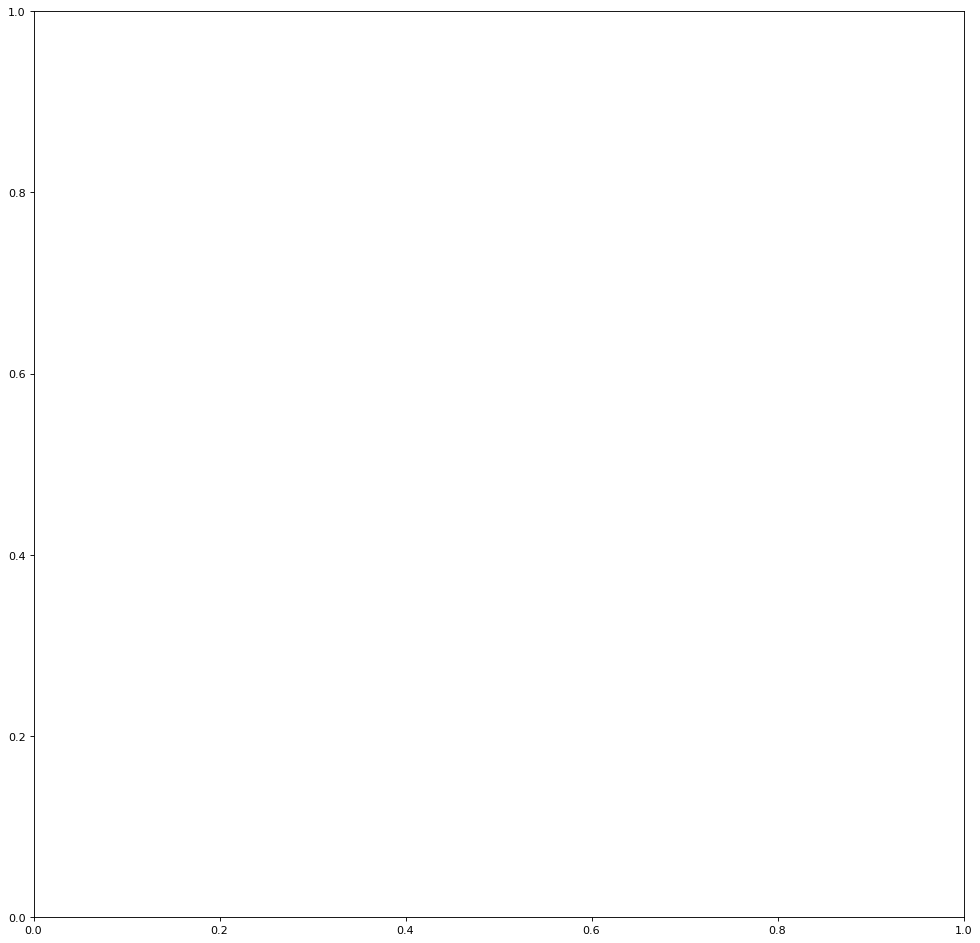

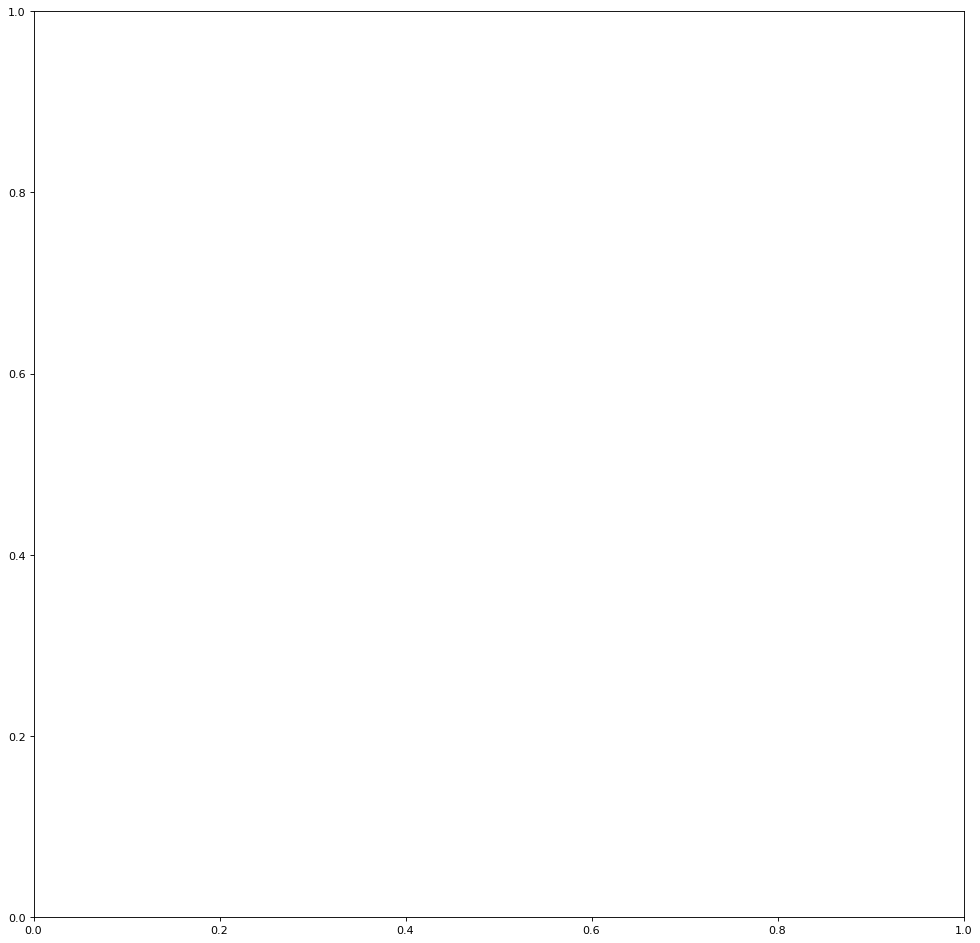

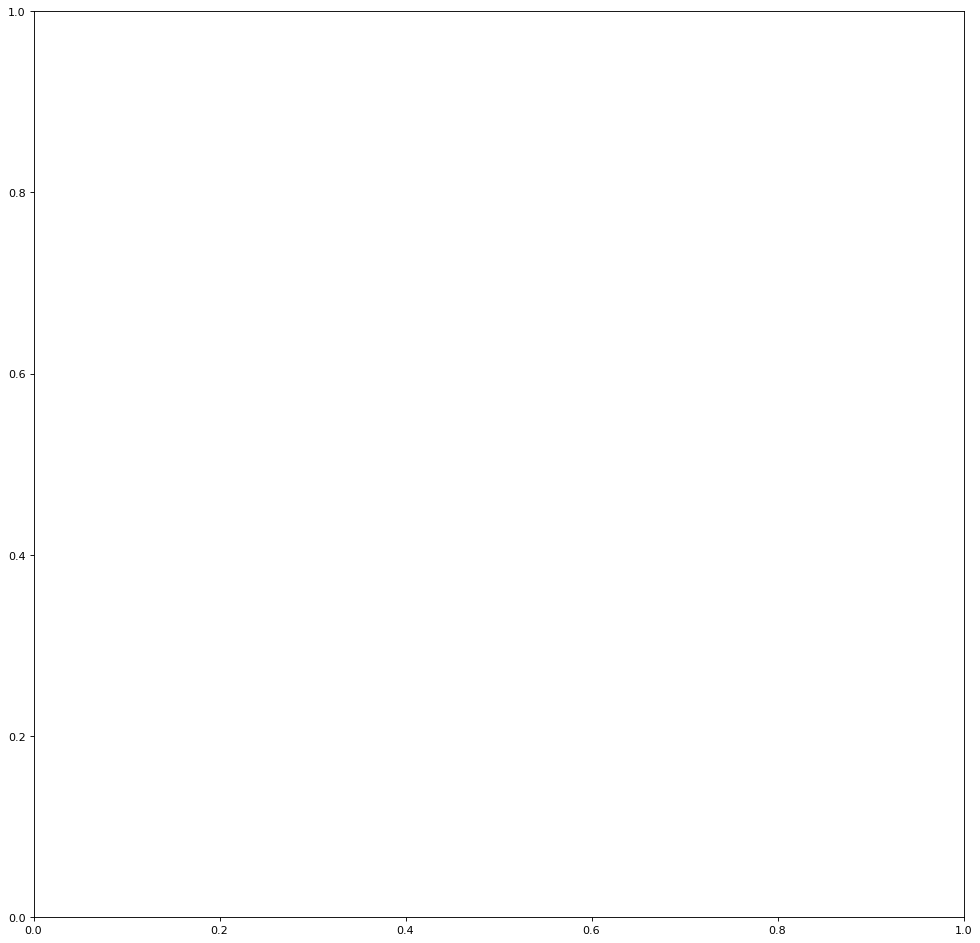

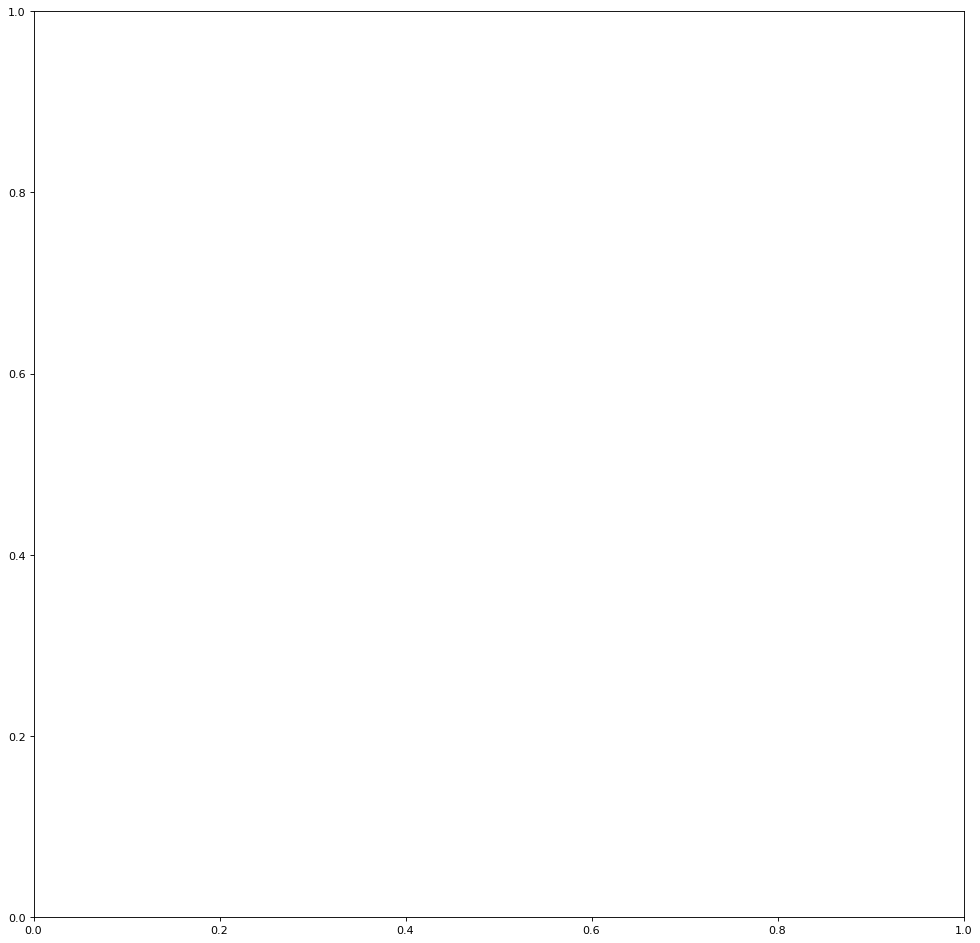

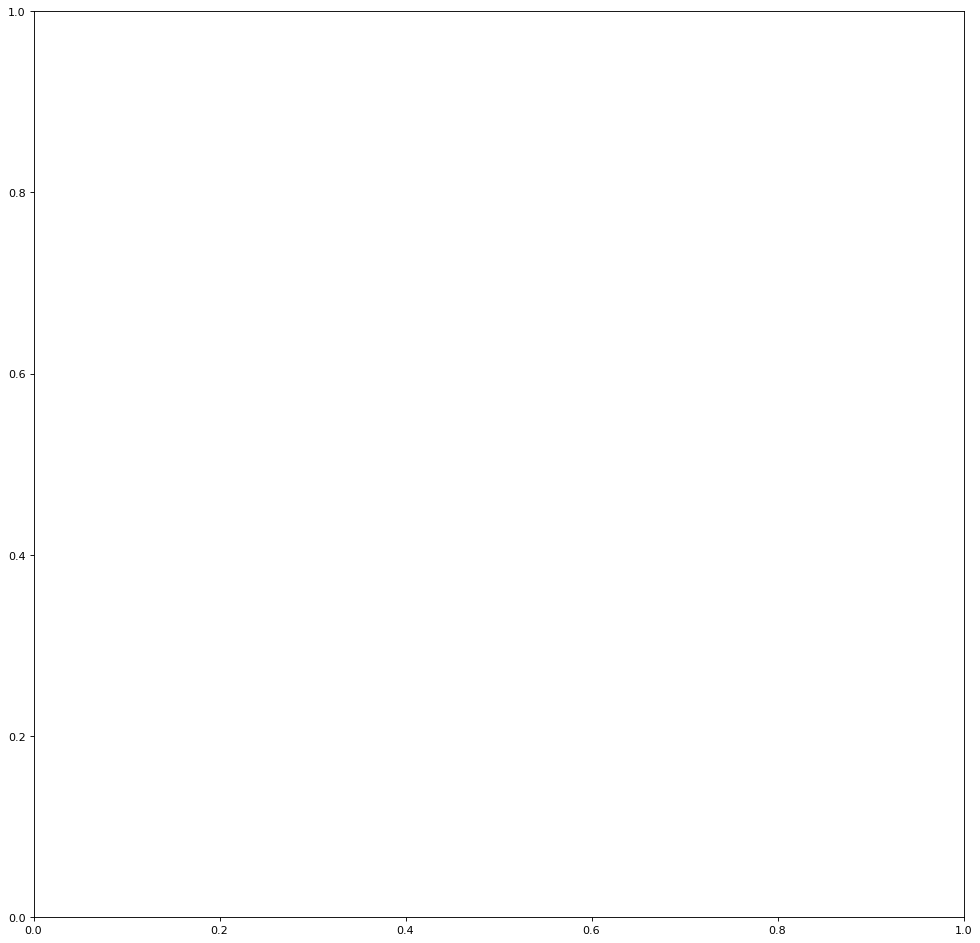

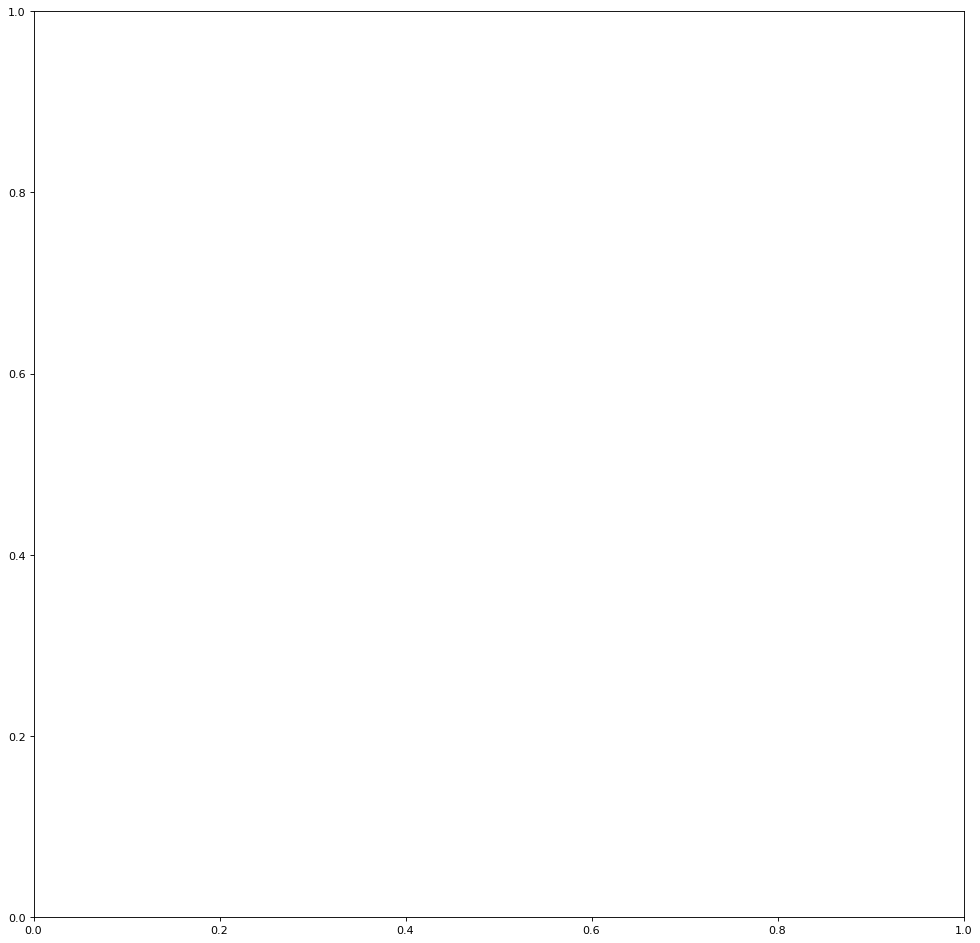

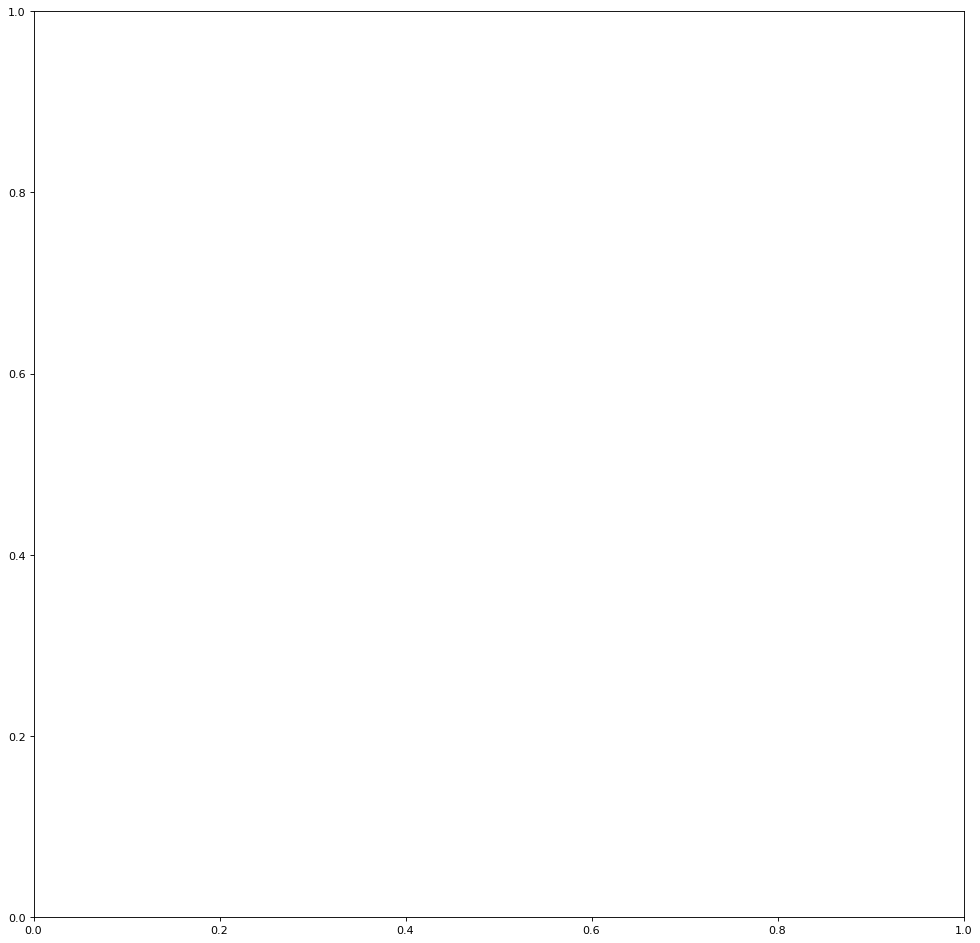

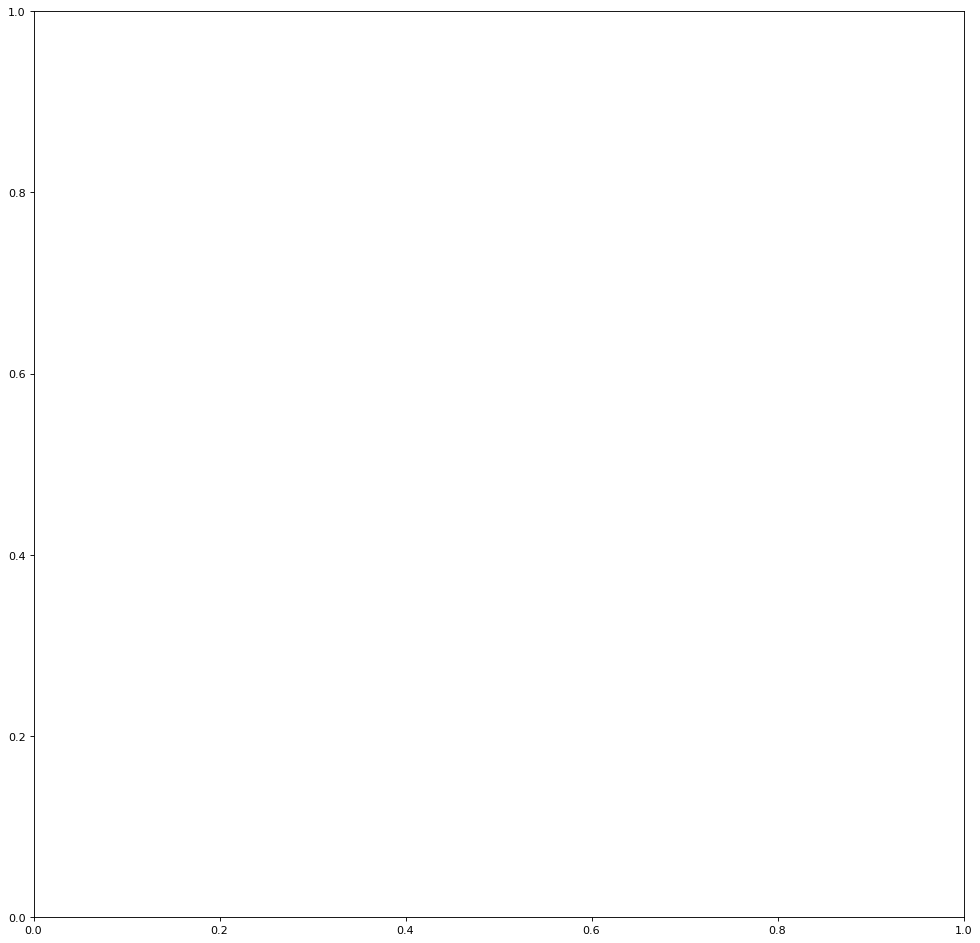

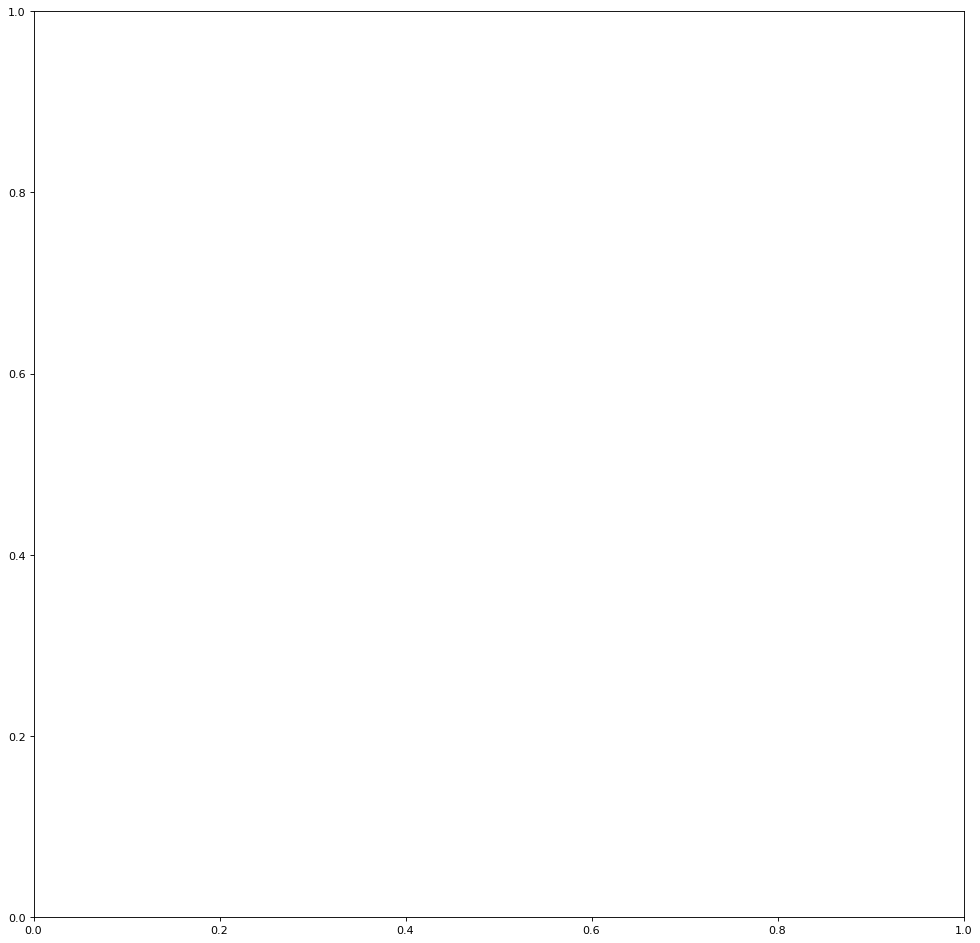

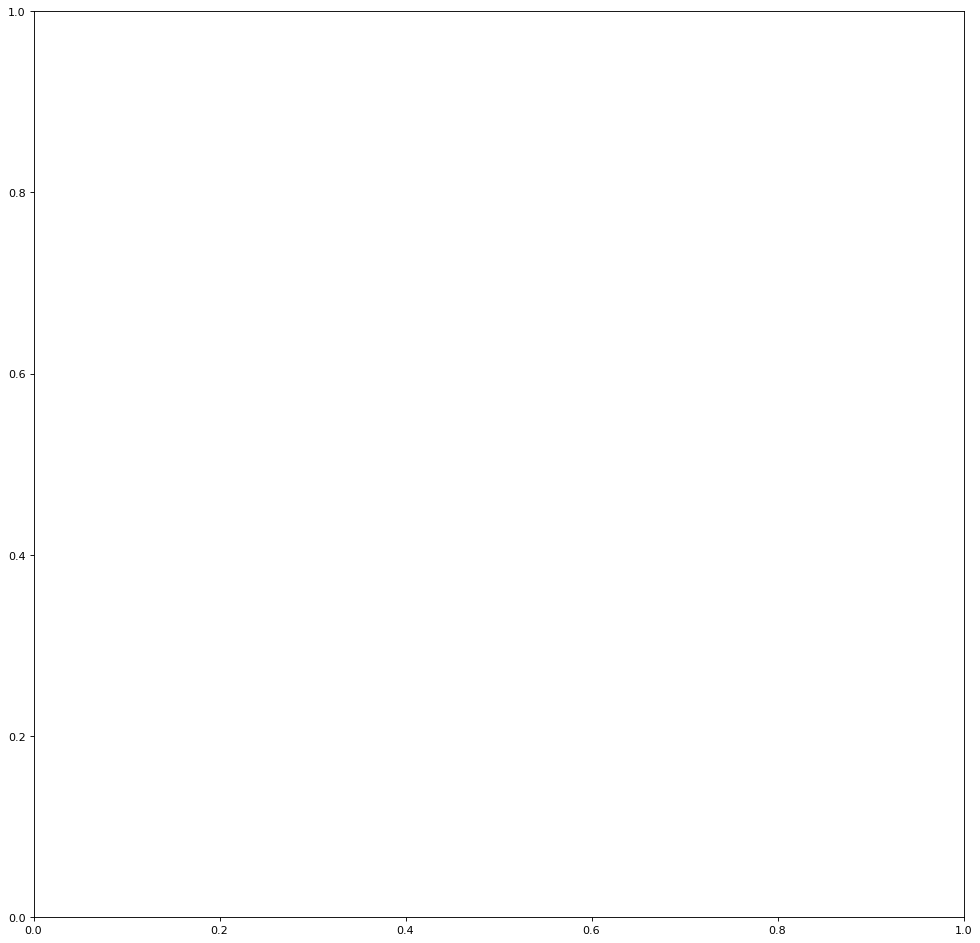

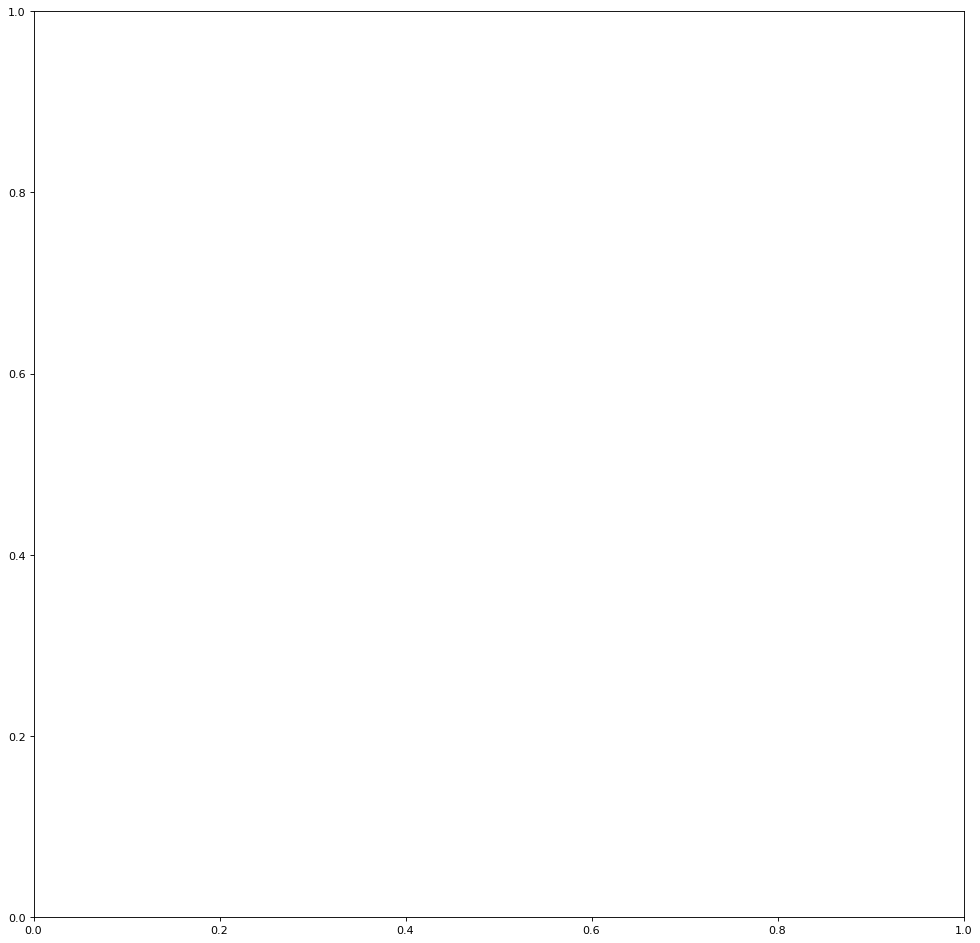

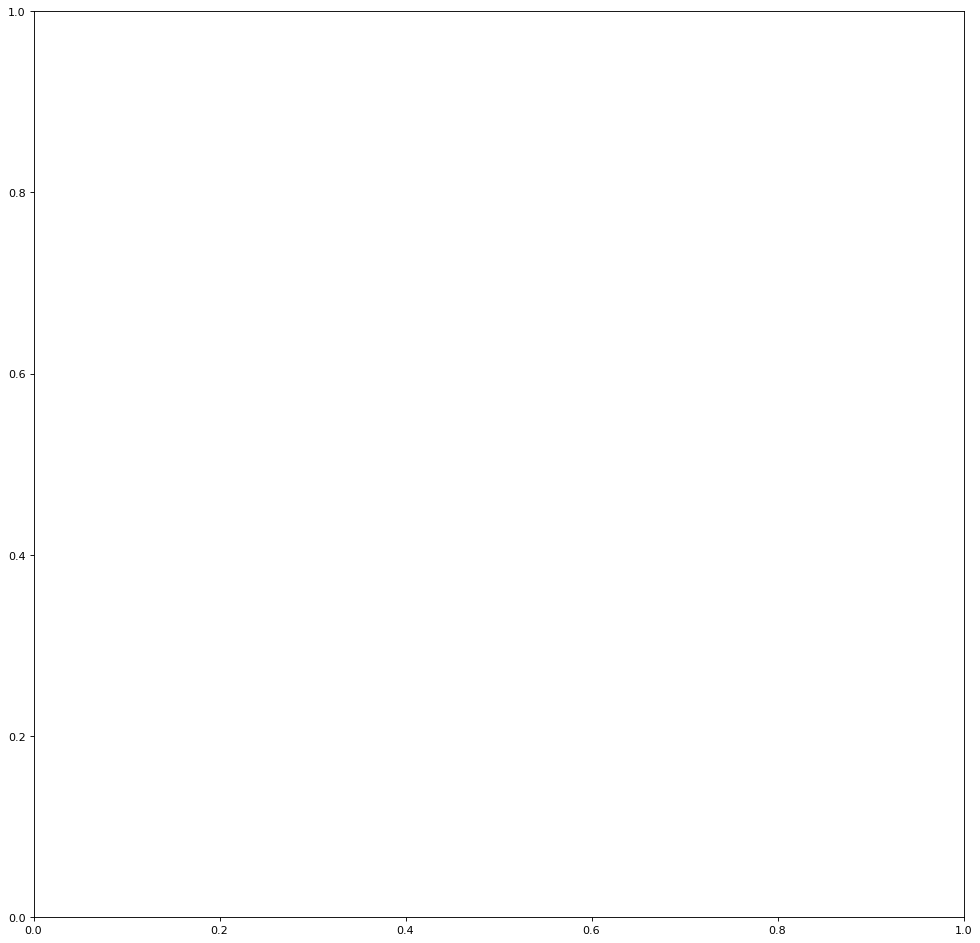

In [12]:
import glob
import matplotlib.animation as animation
from tqdm import tqdm
from scipy import ndimage
from matplotlib.colors import LogNorm
crop = 150
border=20
fullcrop = crop+border
padding = 200
dpi = 100


fig = plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes()
im = ax.imshow(np.zeros(crop*crop).reshape(crop,crop), cmap='gray', origin='lower', vmin=0, vmax=2500)

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

def init():
    pass
    

def update_img(record: ImageRecord):
    hdulist = fits.open(Path(fitsdir, record.file))
    data = hdulist[0].data.astype(float)
    shapex, shapey = hdulist[0].shape
    backgr = data.mean()
    data = data.reshape(shapex, shapey)
    data = np.pad(data, (padding, padding), 'constant', constant_values=(backgr, backgr))
    cropdata = data[record.y-fullcrop+padding:record.y+fullcrop+padding,record.x-fullcrop+padding:record.x+fullcrop+padding]
    rotcrop = ndimage.interpolation.rotate(cropdata, record.rotation)
    rotcrop = crop_center(rotcrop, crop, crop)
    fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
    rotx, roty = rotcrop.shape
    target_app = CircularAperture((rotx//2, roty//2), r=5.)    
    target_app.plot()
    #data[record.y-cropsize:record.y+cropsize,record.x-cropsize:record.x+cropsize] = 0
    #ax.imshow(rotcrop, cmap='gray', origin='lower', norm=LogNorm())
    pbar.update(1)
    im.set_data(rotcrop)
    ax.set_title(f"JD: {record.jd}")
    
pbar = tqdm(total=len(sorted_images[:30]))
ani = animation.FuncAnimation(fig,update_img,frames=sorted_images[:30],interval=30, init_func=init)
writer = animation.writers['ffmpeg'](fps=10)

ani.save(Path(savedir,'demo.mp4'),writer=writer,dpi=dpi)
pbar.close()

